## Imorting necessary modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Load dataset

In [2]:
train_data = pd.read_excel('train_data.xlsx')

In [3]:
# Display basic info
print("Dataset Overview:")
print(train_data.info())
print("\nSample Data:")
display(train_data.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113705 entries, 0 to 113704
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   customer_id          113705 non-null  int64         
 1   transaction_date     113705 non-null  datetime64[ns]
 2   sub_grade            113705 non-null  object        
 3   term                 113705 non-null  object        
 4   home_ownership       113705 non-null  object        
 5   cibil_score          113705 non-null  int64         
 6   total_no_of_acc      113705 non-null  int64         
 7   annual_inc           113705 non-null  float64       
 8   int_rate             113705 non-null  float64       
 9   purpose              113705 non-null  object        
 10  loan_amnt            113705 non-null  int64         
 11  application_type     113705 non-null  object        
 12  installment          113705 non-null  float64       
 

,customer_id,transaction_date,sub_grade,term,home_ownership,cibil_score,total_no_of_acc,annual_inc,int_rate,purpose,loan_amnt,application_type,installment,verification_status,account_bal,emp_length,loan_status
0,10608026,2014-01-01,C5,36 months,MORTGAGE,665,9,70000.0,16.24,debt_consolidation,7200,Individual,253.99,Verified,4648,11,0
1,10235120,2014-01-01,E5,36 months,MORTGAGE,660,8,65000.0,23.40,home_improvement,6000,Individual,233.52,Source Verified,14051,11,1
2,10705805,2014-01-01,D2,36 months,MORTGAGE,660,7,73000.0,17.57,other,8000,Individual,287.50,Verified,14885,11,0
3,11044991,2014-01-01,B4,36 months,MORTGAGE,690,5,118000.0,12.85,debt_consolidation,10000,Individual,336.22,Source Verified,7542,2,1
4,10161054,2014-01-01,C3,60 months,MORTGAGE,665,5,63000.0,14.98,debt_consolidation,10000,Individual,237.80,Verified,6318,11,0


## Checking for missing values

In [7]:
print("Missing Values:")
missing_values = train_data.isnull().sum()
print(missing_values)
print(missing_values[missing_values > 0])

Missing Values:
customer_id            0
transaction_date       0
sub_grade              0
term                   0
home_ownership         0
cibil_score            0
total_no_of_acc        0
annual_inc             0
int_rate               0
purpose                0
loan_amnt              0
application_type       0
installment            0
verification_status    0
account_bal            0
emp_length             0
loan_status            0
dtype: int64
Series([], dtype: int64)


## Target variable distribution

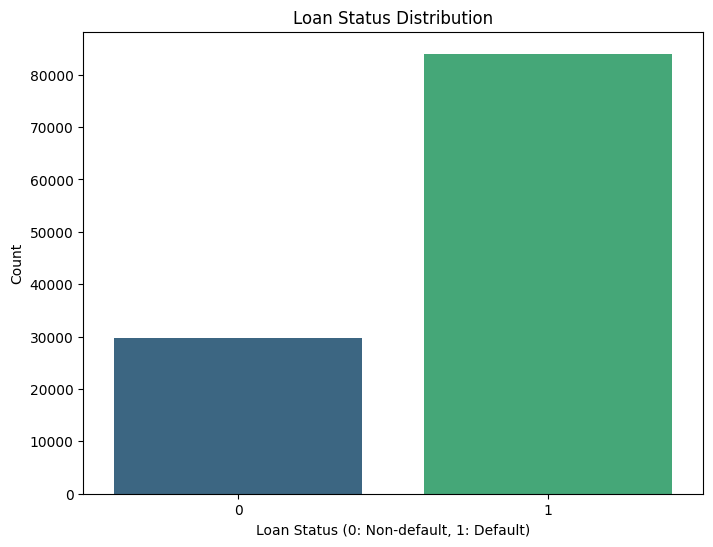

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x='loan_status', data=train_data, hue='loan_status', palette='viridis', legend=False)
plt.title("Loan Status Distribution")
plt.xlabel("Loan Status (0: Non-default, 1: Default)")
plt.ylabel("Count")
plt.show()

### Percentage Distribution

In [11]:
default_percent = train_data['loan_status'].value_counts(normalize=True) * 100
print("Loan Status Percentage Distribution:")
print(default_percent)

Loan Status Percentage Distribution:
loan_status
1    73.889451
0    26.110549
Name: proportion, dtype: float64


## Extract year, month, and day for analysis

In [12]:
train_data['year'] = train_data['transaction_date'].dt.year
train_data['month'] = train_data['transaction_date'].dt.month
train_data['day'] = train_data['transaction_date'].dt.day

## Temporal trends

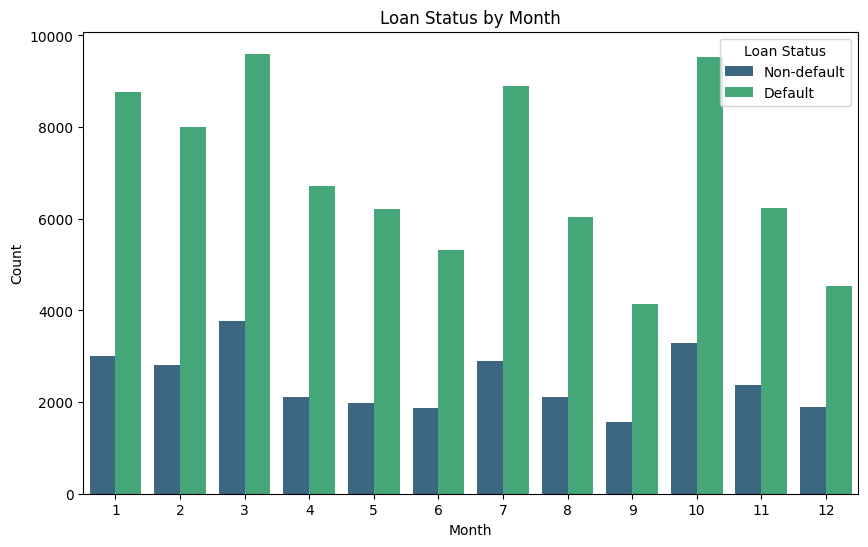

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='month', hue='loan_status', data=train_data, palette='viridis')
plt.title("Loan Status by Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend(title="Loan Status", loc='upper right', labels=['Non-default', 'Default'])
plt.show()

## Summary statistics

In [14]:
print("Summary Statistics:")
display(train_data.describe())

Summary Statistics:


,customer_id,transaction_date,cibil_score,total_no_of_acc,annual_inc,int_rate,loan_amnt,installment,account_bal,emp_length,loan_status,year,month,day
count,1.137050e+05,113705,113705.000000,113705.000000,1.137050e+05,113705.000000,113705.000000,113705.000000,113705.000000,113705.000000,113705.000000,113705.000000,113705.000000,113705.0
mean,4.359137e+07,2015-03-04 22:24:20.769535232,684.398707,0.272934,7.138822e+04,15.955469,15158.144980,454.241150,15820.487094,5.959782,0.738895,2014.750442,6.088686,1.0
min,3.630090e+05,2014-01-01 00:00:00,660.000000,0.000000,0.000000e+00,12.050000,1000.000000,33.240000,0.000000,0.000000,0.000000,2014.000000,1.000000,1.0
25%,2.509597e+07,2014-08-01 00:00:00,665.000000,0.000000,4.300000e+04,13.330000,8000.000000,265.740000,5656.000000,2.000000,0.000000,2014.000000,3.000000,1.0
50%,4.504932e+07,2015-04-01 00:00:00,680.000000,0.000000,6.000000e+04,14.990000,13300.000000,388.290000,10841.000000,6.000000,1.000000,2015.000000,6.000000,1.0
75%,6.134344e+07,2015-10-01 00:00:00,695.000000,0.000000,8.500000e+04,17.860000,20225.000000,599.530000,19682.000000,11.000000,1.000000,2015.000000,9.000000,1.0
max,7.615383e+07,2016-03-01 00:00:00,845.000000,10.000000,8.900060e+06,28.990000,40000.000000,1460.430000,875598.000000,11.000000,1.000000,2016.000000,12.000000,1.0
std,2.016104e+07,NaN,22.871241,0.647328,6.050616e+04,3.234215,9091.279851,268.251678,20447.614824,4.229570,0.439239,0.656989,3.481335,0.0


## Distribution plots for numerical features

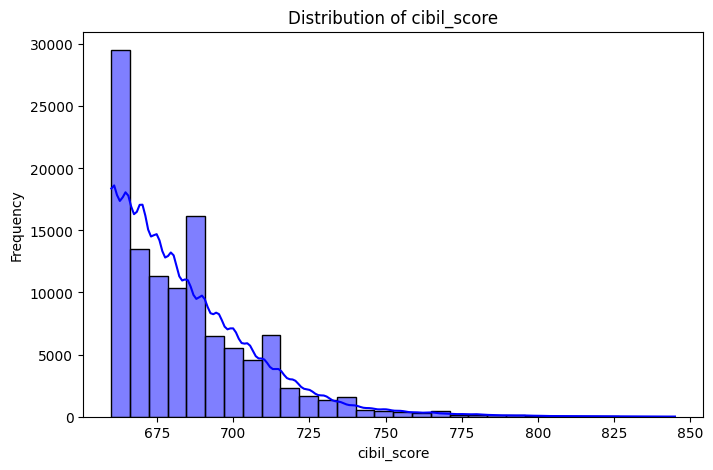

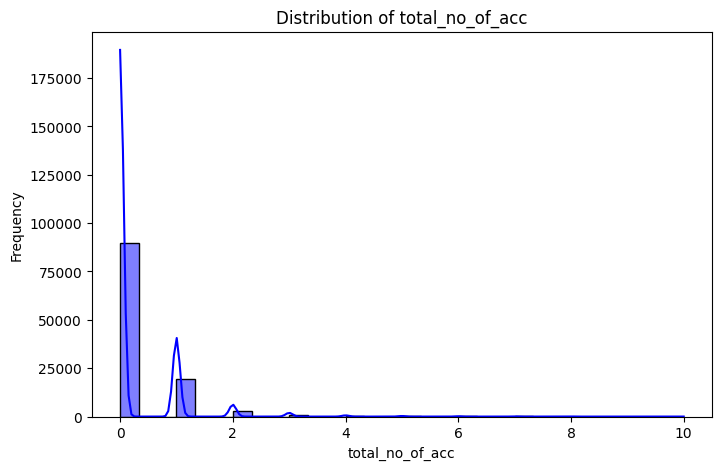

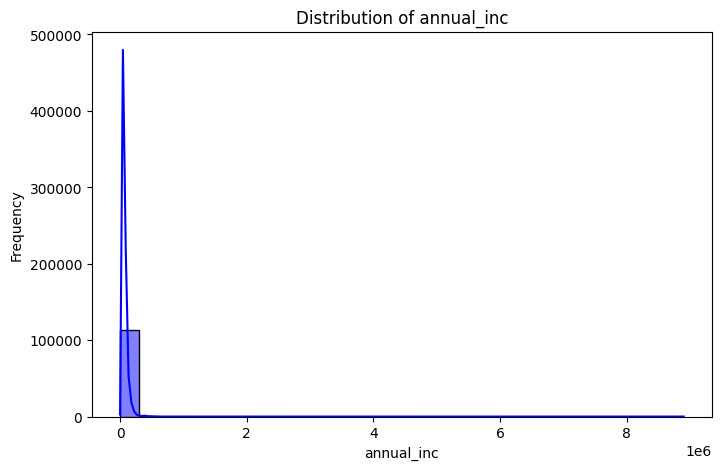

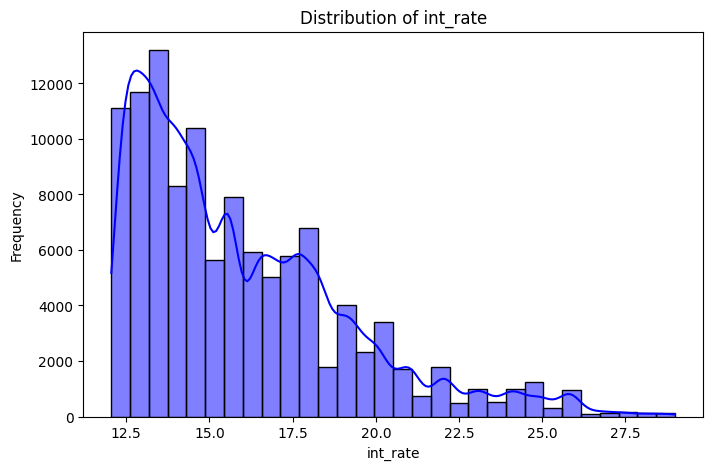

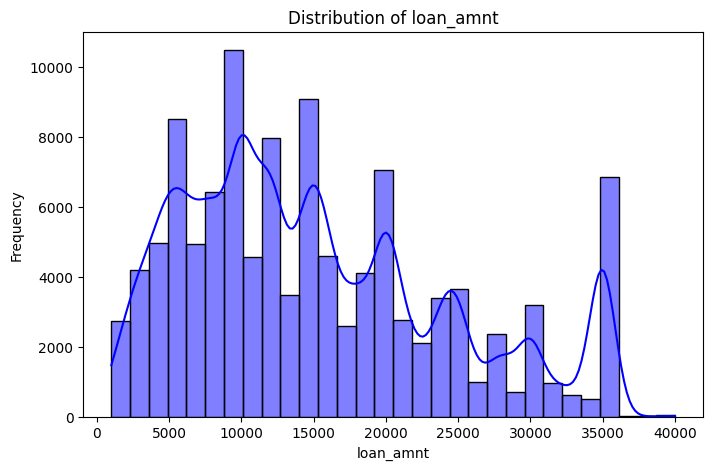

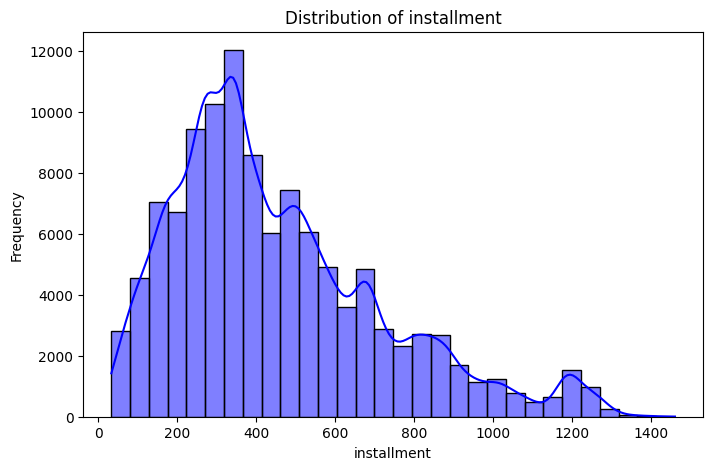

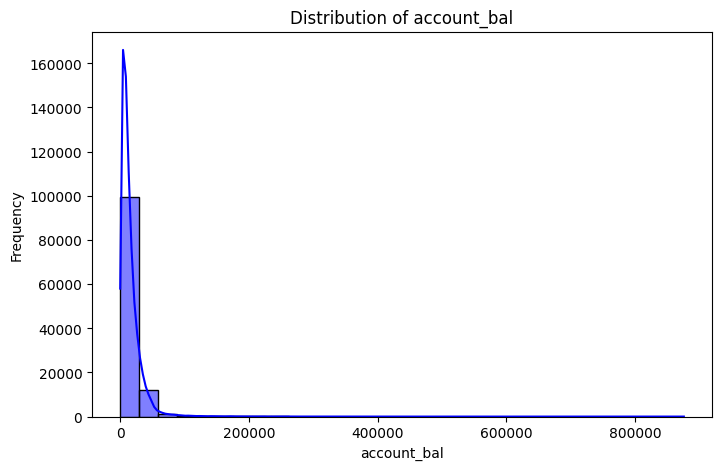

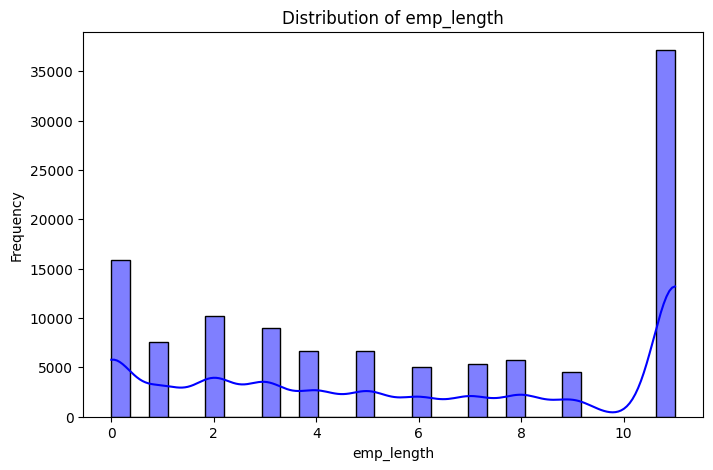

In [15]:
numerical_cols = ['cibil_score', 'total_no_of_acc', 'annual_inc', 'int_rate', 
                  'loan_amnt', 'installment', 'account_bal', 'emp_length']

for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(train_data[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

## Count plots for categorical features

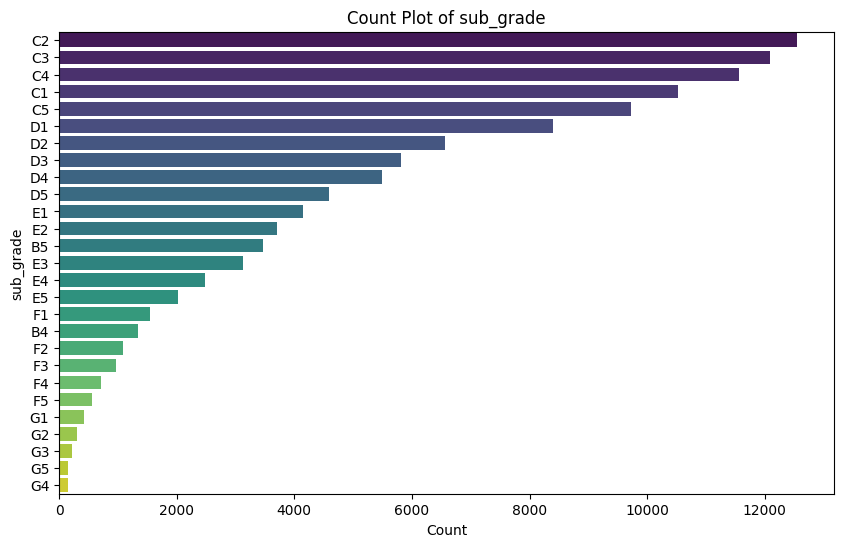

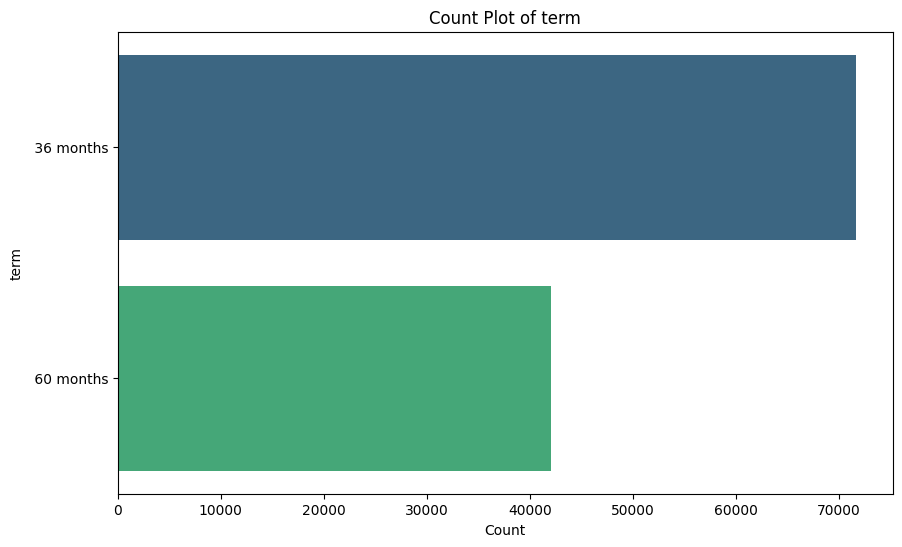

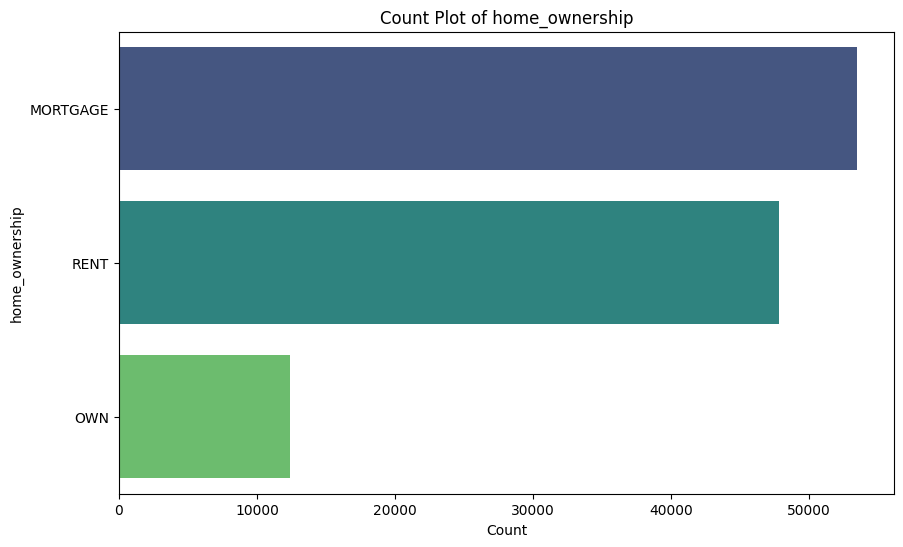

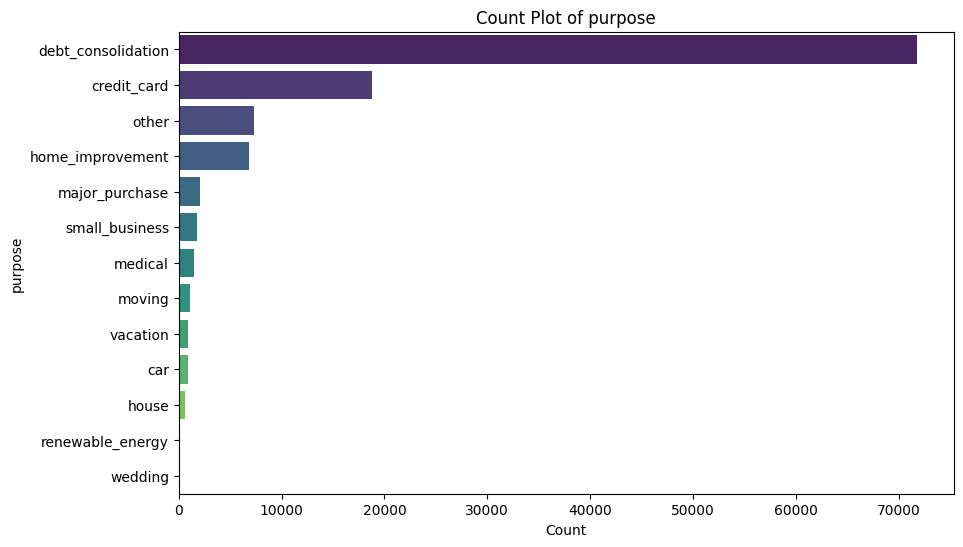

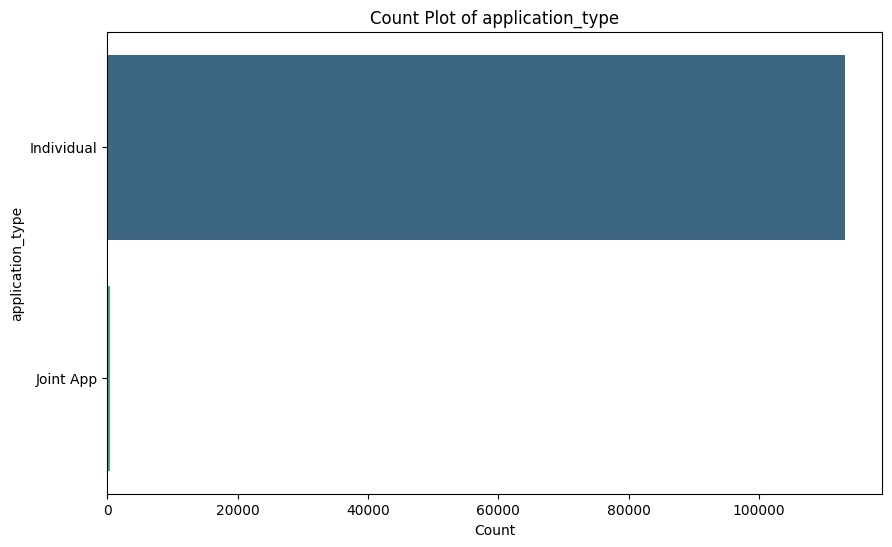

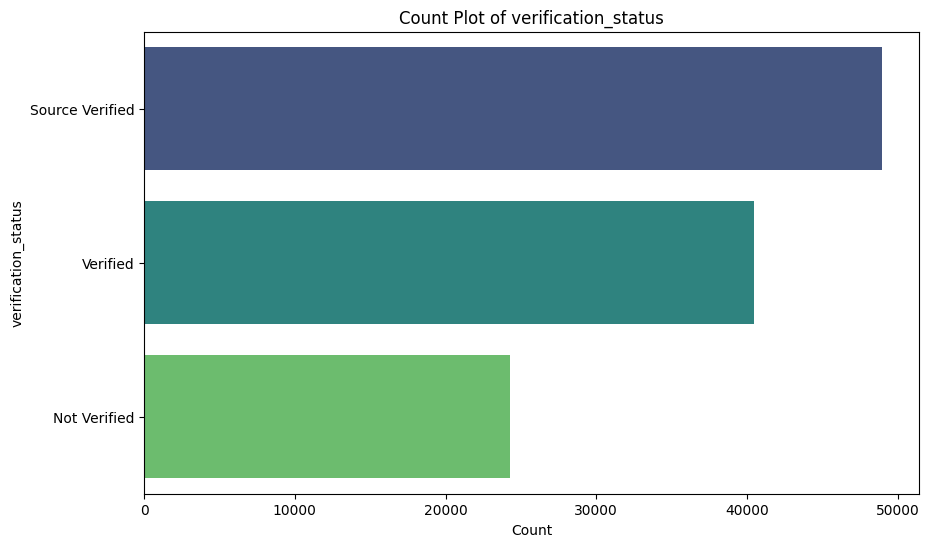

In [18]:
categorical_cols = ['sub_grade', 'term', 'home_ownership', 'purpose', 
                    'application_type', 'verification_status']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=col, data=train_data, order=train_data[col].value_counts().index, palette='viridis')
    plt.title(f"Count Plot of {col}")
    plt.ylabel(col)
    plt.xlabel("Count")
    plt.show()

## Correlation heatmap

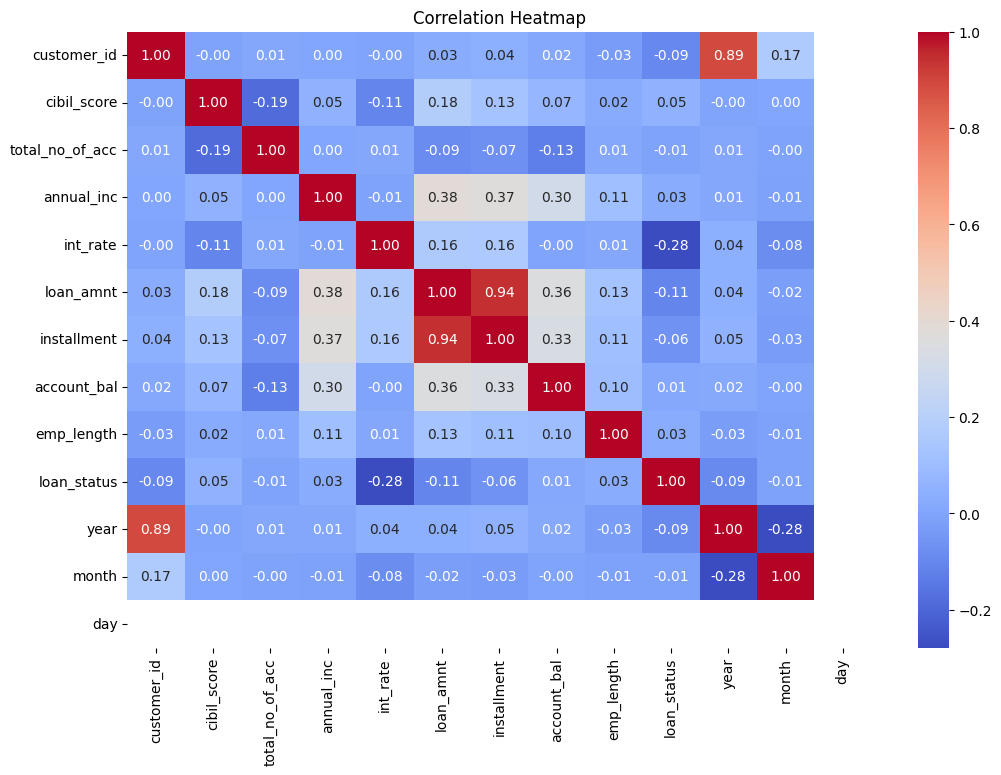

In [20]:
plt.figure(figsize=(12, 8))
numeric_cols = train_data.select_dtypes(include=[np.number]).columns
correlation_matrix = train_data[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


## Boxplots for numerical features against target

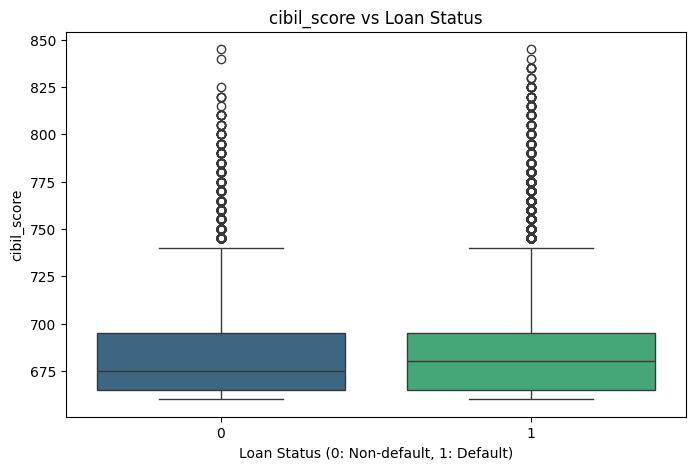

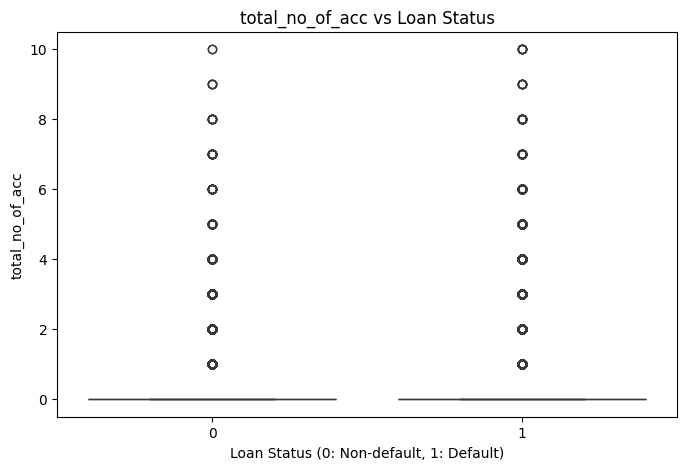

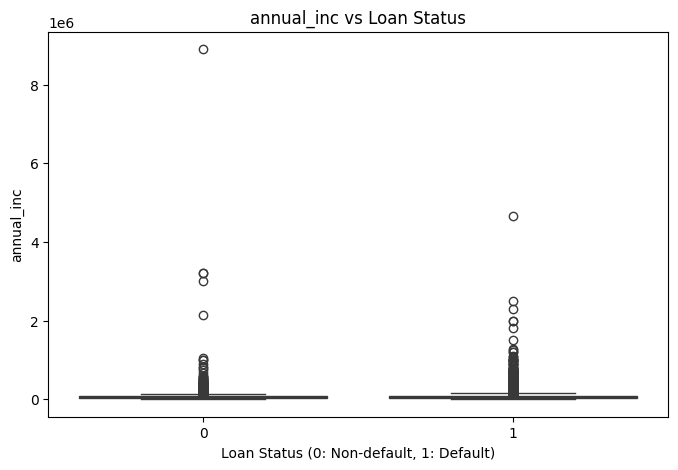

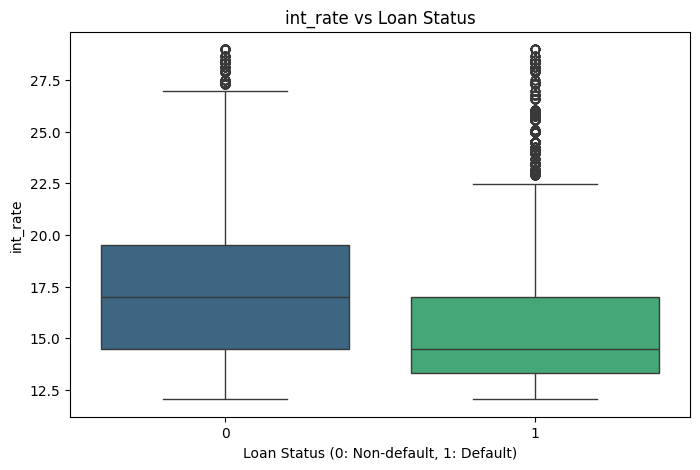

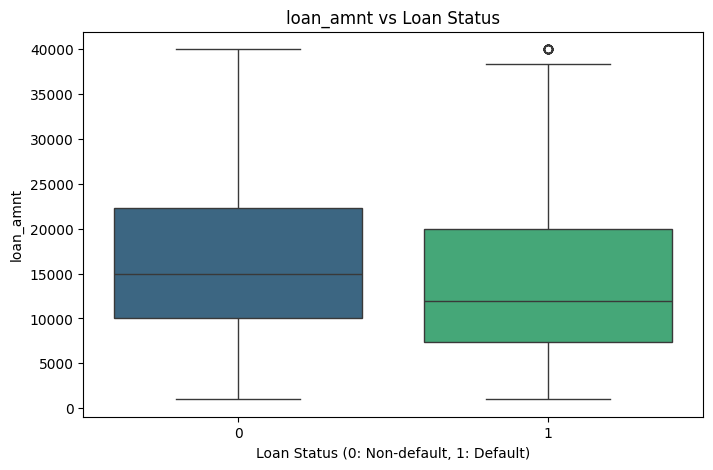

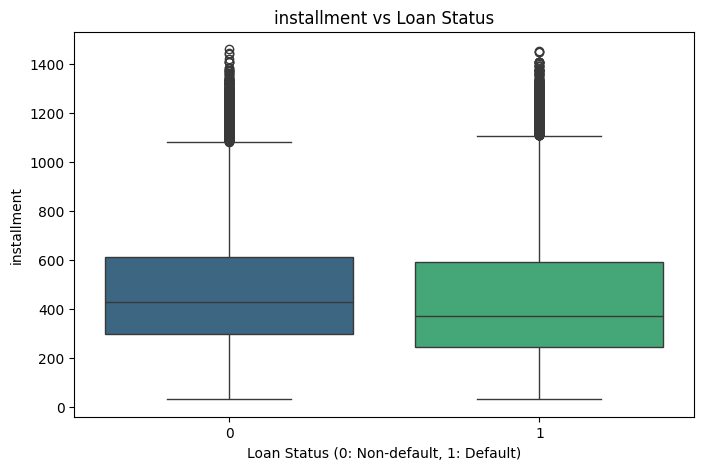

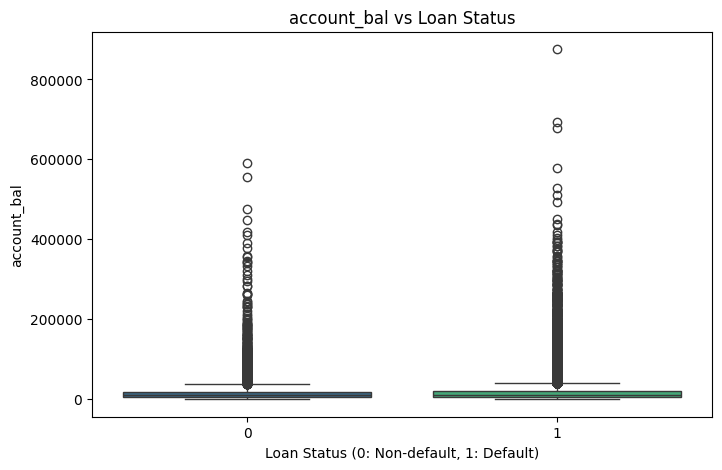

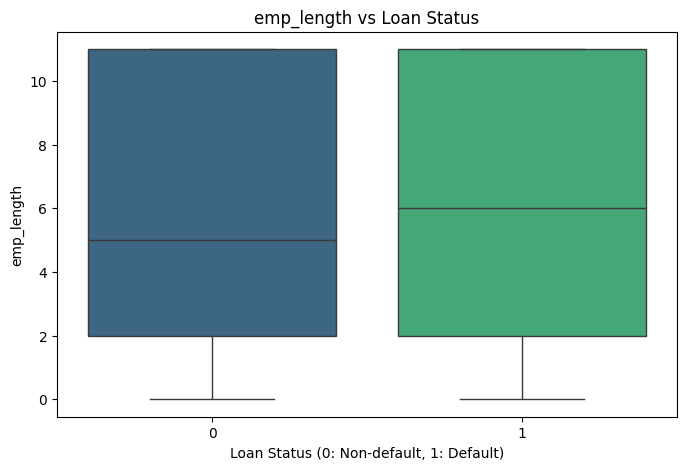

In [21]:
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='loan_status', y=col, data=train_data, palette='viridis')
    plt.title(f"{col} vs Loan Status")
    plt.xlabel("Loan Status (0: Non-default, 1: Default)")
    plt.ylabel(col)
    plt.show()

## EDA Analysis

### 1. Target Variable (loan_status) is Imbalanced

- The proportion of `loan_status` classes (default vs. non-default) shows an imbalance.
- Typically, this means that default cases (`1`) are fewer than non-default cases (`0`).
- **Impact**: Imbalance could bias the model toward predicting the majority class.

---

### 2. Temporal Patterns

- Loan defaults show potential trends over months or years.
- Seasonal variations or time-based influences may exist.

---

### 3. Strong Correlations with Target

- Certain numerical features, such as `cibil_score` and `account_bal`, have notable correlations with `loan_status`.
- Lower `cibil_score` and account balances likely increase default probability.

---

### 4. Outliers Observed

- Variables like `annual_inc` and `account_bal` contain extreme outlier values.

---

### 5. Categorical Features Significance

- Features like `sub_grade`, `purpose`, and `home_ownership` seem to influence default rates.
- **Example**: Certain grades or purposes (e.g., `sub_grade = E5`) may have higher default probabilities.